In [35]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
from matplotlib import pyplot
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [2]:
df = pd.read_csv("yelp_review_sentiment_2classes.tsv", delimiter="\t")
df = df.dropna()

In [3]:
tqdm.pandas()
en_stopwords = stopwords.words('english') + ["-PRON-"]
pd.set_option('display.max_rows', 100)

/Users/akurniawan/opt/miniconda3/envs/ics5110/lib/python3.8/site-packages/tqdm/std.py:725: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Word distributions

## Without stopwords

In [4]:
words = []
for idx, row in df.iterrows():
    words.extend(str(row["text"]).split(" "))
counter = Counter(words)
len(counter)

233979

[Text(0, 0, '-PRON-'),
 Text(1, 0, 'be'),
 Text(2, 0, 'the'),
 Text(3, 0, 'and'),
 Text(4, 0, 'to'),
 Text(5, 0, 'i'),
 Text(6, 0, 'a'),
 Text(7, 0, 'have'),
 Text(8, 0, 'not'),
 Text(9, 0, 'of'),
 Text(10, 0, 'for'),
 Text(11, 0, 'in'),
 Text(12, 0, 'that'),
 Text(13, 0, 'do'),
 Text(14, 0, 'this'),
 Text(15, 0, 'with'),
 Text(16, 0, 'on'),
 Text(17, 0, 'but'),
 Text(18, 0, 'get'),
 Text(19, 0, 'go'),
 Text(20, 0, 'so'),
 Text(21, 0, 'at'),
 Text(22, 0, 'good'),
 Text(23, 0, 'food'),
 Text(24, 0, 'place'),
 Text(25, 0, 'time'),
 Text(26, 0, 'there'),
 Text(27, 0, 'come'),
 Text(28, 0, 'as'),
 Text(29, 0, 'order'),
 Text(30, 0, 'service'),
 Text(31, 0, 'out'),
 Text(32, 0, 'very'),
 Text(33, 0, 'would'),
 Text(34, 0, 'if'),
 Text(35, 0, 'all'),
 Text(36, 0, 'will'),
 Text(37, 0, 'just'),
 Text(38, 0, 'when'),
 Text(39, 0, 'like'),
 Text(40, 0, 'one'),
 Text(41, 0, 'back'),
 Text(42, 0, 'say'),
 Text(43, 0, 'here'),
 Text(44, 0, 'up'),
 Text(45, 0, 'no'),
 Text(46, 0, 'from'),
 Text(47,

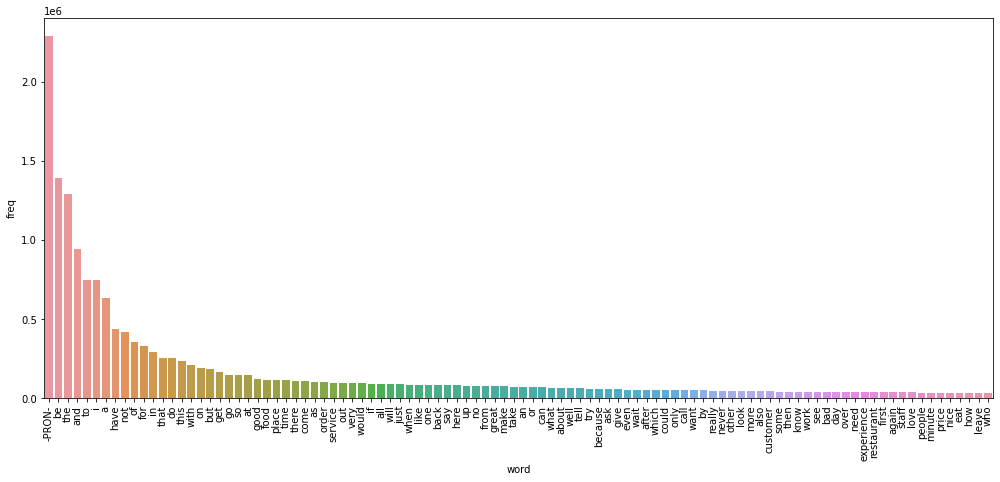

In [5]:
a4_dims = (17, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(data=pd.DataFrame(counter.most_common(100), columns=["word", "freq"]), x="word", y="freq", ax=ax)
g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)

## With stopwords

In [6]:
words = []
for idx, row in df.iterrows():
    words.extend([word for word in str(row["text"]).split(" ") if word not in en_stopwords])
counter = Counter(words)
len(counter)

233845

[Text(0, 0, 'get'),
 Text(1, 0, 'go'),
 Text(2, 0, 'good'),
 Text(3, 0, 'food'),
 Text(4, 0, 'place'),
 Text(5, 0, 'time'),
 Text(6, 0, 'come'),
 Text(7, 0, 'order'),
 Text(8, 0, 'service'),
 Text(9, 0, 'would'),
 Text(10, 0, 'like'),
 Text(11, 0, 'one'),
 Text(12, 0, 'back'),
 Text(13, 0, 'say'),
 Text(14, 0, 'great'),
 Text(15, 0, 'make'),
 Text(16, 0, 'take'),
 Text(17, 0, 'well'),
 Text(18, 0, 'tell'),
 Text(19, 0, 'try'),
 Text(20, 0, 'ask'),
 Text(21, 0, 'give'),
 Text(22, 0, 'even'),
 Text(23, 0, 'wait'),
 Text(24, 0, 'could'),
 Text(25, 0, 'call'),
 Text(26, 0, 'want'),
 Text(27, 0, 'really'),
 Text(28, 0, 'never'),
 Text(29, 0, 'look'),
 Text(30, 0, 'also'),
 Text(31, 0, 'customer'),
 Text(32, 0, 'know'),
 Text(33, 0, 'work'),
 Text(34, 0, 'see'),
 Text(35, 0, 'bad'),
 Text(36, 0, 'day'),
 Text(37, 0, 'need'),
 Text(38, 0, 'experience'),
 Text(39, 0, 'restaurant'),
 Text(40, 0, 'first'),
 Text(41, 0, 'staff'),
 Text(42, 0, 'love'),
 Text(43, 0, 'people'),
 Text(44, 0, 'minute'

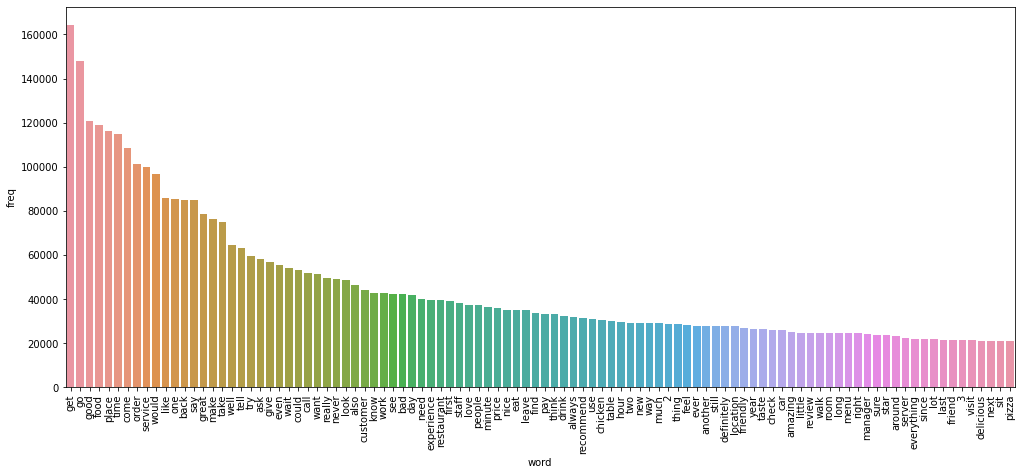

In [7]:
a4_dims = (17, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.barplot(data=pd.DataFrame(counter.most_common(100), columns=["word", "freq"]), x="word", y="freq", ax=ax)
g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)

# Ngrams for both classes

In [8]:
def remove_stopwords(text):
    sent = []
    for word in text.split():
        if word not in en_stopwords:
            sent.append(word)
            
    return " ".join(sent)

pos_text = df[df["sentiment"] == "good"]["text"].map(remove_stopwords)
neg_text = df[df["sentiment"] == "bad"]["text"].map(remove_stopwords)

## Positive ngrams

In [9]:
ngrams_res = [[], [], []]
for row in tqdm(pos_text, total=len(pos_text)):
    for i in range(1, 4):
        this_res = []
        for t in set(ngrams(row.split(" "), n=i)):
            this_res.append(" ".join(t))
        ngrams_res[i-1].extend(this_res)

100%|██████████| 124797/124797 [00:11<00:00, 11295.74it/s]


In [10]:
len(ngrams_res[0]), len(ngrams_res[1]), len(ngrams_res[2])

(4716335, 5367787, 5311479)

In [11]:
pos_unigrams_freq = Counter(ngrams_res[0])
pos_bigram_freq = Counter(ngrams_res[1])
pos_trigram_freq = Counter(ngrams_res[2])

In [12]:
len(pos_unigrams_freq), len(pos_bigram_freq), len(pos_trigram_freq)

(131750, 1930553, 4485569)

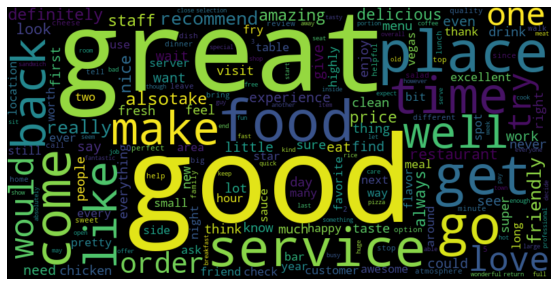

In [13]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(pos_unigrams_freq)

# Display the generated image:
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

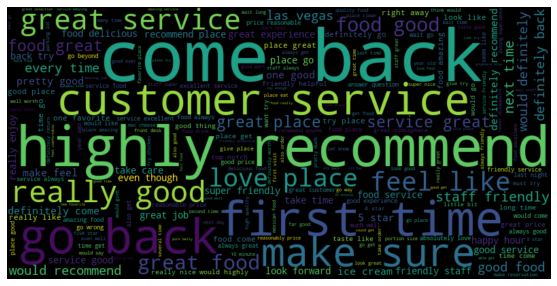

In [14]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(pos_bigram_freq)

# Display the generated image:
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

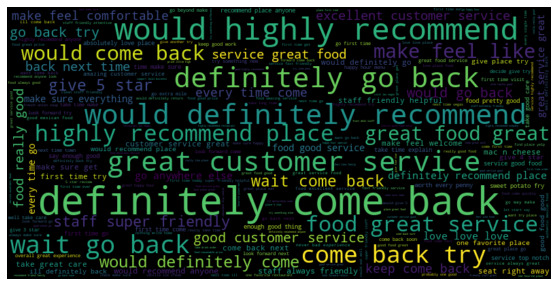

In [15]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(pos_trigram_freq)

# Display the generated image:
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
uni_com = pos_unigrams_freq.most_common()
bi_com = pos_bigram_freq.most_common()
tri_com = pos_trigram_freq.most_common()

single_freq = [d for d in uni_com if d[1] == 1]
five_freq = [d for d in uni_com if d[1] == 5]
tenth_freq = [d for d in uni_com if d[1] == 10]

low_pos_words_df = pd.DataFrame(single_freq + five_freq + tenth_freq, columns=["word", "freq"])
low_pos_words_df.head()

,word,freq
0,checkedi,1
1,adjustmentsalignment,1
2,64th,1
3,alannah,1
4,helpagain,1


In [17]:
low_pos_words_df[low_pos_words_df["freq"] == 1].head(20)

,word,freq
0,checkedi,1
1,adjustmentsalignment,1
2,64th,1
3,alannah,1
4,helpagain,1
5,reshelve,1
6,described,1
7,officewhere,1
8,kitchenif,1
9,432019,1


In [18]:
low_pos_words_df[low_pos_words_df["freq"] == 5].head(20)

,word,freq
88727,pathfinder,5
88728,wayy,5
88729,goodgood,5
88730,sprayer,5
88731,colder,5
88732,mosey,5
88733,himi,5
88734,ssd,5
88735,prick,5
88736,lolmy,5


In [19]:
low_pos_words_df[low_pos_words_df["freq"] == 10].head(20)

,word,freq
91034,projection,10
91035,hereso,10
91036,tory,10
91037,roar,10
91038,mustache,10
91039,lather,10
91040,unappetize,10
91041,makeyourown,10
91042,goldendoodle,10
91043,backsplash,10


## Negative ngrams

In [20]:
ngrams_res = [[], [], []]
for row in tqdm(neg_text, total=len(pos_text)):
    for i in range(1, 4):
        this_res = []
        for t in set(ngrams(row.split(" "), n=i)):
            this_res.append(" ".join(t))
        ngrams_res[i-1].extend(this_res)

125181it [00:15, 8269.74it/s]                            


In [21]:
len(ngrams_res[0]), len(ngrams_res[1]), len(ngrams_res[2])

(6171591, 7607152, 7643615)

In [22]:
neg_unigrams_freq = Counter(ngrams_res[0])
neg_bigram_freq = Counter(ngrams_res[1])
neg_trigram_freq = Counter(ngrams_res[2])

In [23]:
len(neg_unigrams_freq), len(neg_bigram_freq), len(neg_trigram_freq)

(151568, 2474382, 6359375)

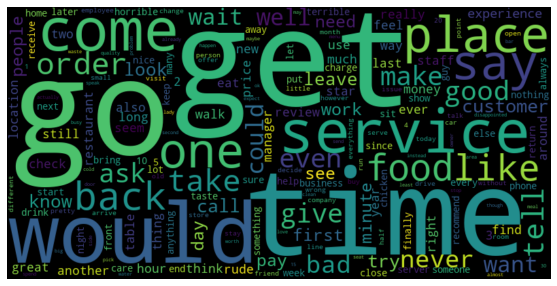

In [24]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(neg_unigrams_freq)

# Display the generated image:
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

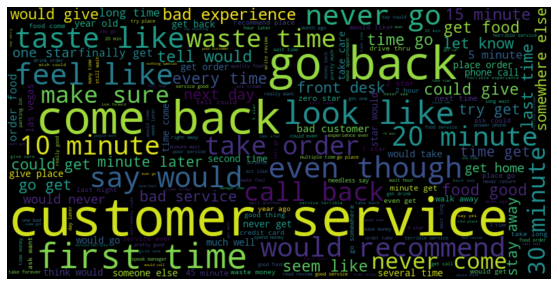

In [25]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(neg_bigram_freq)

# Display the generated image:
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

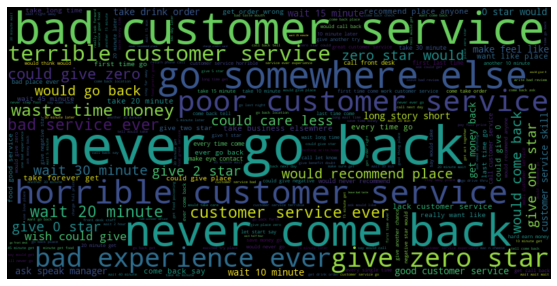

In [26]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(neg_trigram_freq)

# Display the generated image:
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
uni_com = neg_unigrams_freq.most_common()
bi_com = neg_bigram_freq.most_common()
tri_com = neg_trigram_freq.most_common()

single_freq = [d for d in uni_com if d[1] == 1]
five_freq = [d for d in uni_com if d[1] == 5]
tenth_freq = [d for d in uni_com if d[1] == 10]

low_neg_words_df = pd.DataFrame(single_freq + five_freq + tenth_freq, columns=["word", "freq"])
low_neg_words_df.head()

,word,freq
0,chargedthese,1
1,waitedjust,1
2,noniphone,1
3,nonuser,1
4,qualityatmosphere,1


In [28]:
low_neg_words_df[low_neg_words_df["freq"] == 1].head(20)

,word,freq
0,chargedthese,1
1,waitedjust,1
2,noniphone,1
3,nonuser,1
4,qualityatmosphere,1
5,increadibly,1
6,exploredupdate,1
7,lateryour,1
8,surfacesfinally,1
9,appreciatedthat,1


In [29]:
low_neg_words_df[low_neg_words_df["freq"] == 5].head(20)

,word,freq
103660,newsletter,5
103661,showgrow,5
103662,readi,5
103663,24k,5
103664,offroad,5
103665,poori,5
103666,topit,5
103667,thingy,5
103668,caribou,5
103669,smartly,5


In [30]:
low_neg_words_df[low_neg_words_df["freq"] == 10].head(20)

,word,freq
106132,insulated,10
106133,mum,10
106134,deja,10
106135,17k,10
106136,stevia,10
106137,cheesethe,10
106138,purport,10
106139,clove,10
106140,trane,10
106141,counterpart,10


In [31]:
low_pos_words_df.count(), low_neg_words_df.count()

(word    91774
 freq    91774
 dtype: int64,
 word    106914
 freq    106914
 dtype: int64)

In [32]:
len(neg_unigrams_freq) + len(neg_bigram_freq) + len(neg_trigram_freq)

8985325

In [33]:
len(pos_unigrams_freq) + len(pos_bigram_freq) + len(pos_trigram_freq)

6547872

# Word distributions overlap

In [36]:
train, test = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)

In [64]:
sentences = []
for row in train["text"]:
    sentences.append(" ".join([word for word in str(row).split(" ") if word not in en_stopwords]))
train["text"] = sentences

sentences = []
for row in test["text"]:
    sentences.append(" ".join([word for word in str(row).split(" ") if word not in en_stopwords]))
test["text"] = sentences

<ipython-input-64-eb9b119675b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = sentences
<ipython-input-64-eb9b119675b3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["text"] = sentences


In [65]:
ngrams_train = [[], [], [], [], []]
for row in tqdm(train["text"], total=len(train["text"])):
    for i in range(1, 6):
        this_train = []
        for t in set(ngrams(row.split(" "), n=i)):
            this_train.append(" ".join(t))
        ngrams_train[i-1].extend(list(set(this_train)))

100%|██████████| 224980/224980 [00:48<00:00, 4637.21it/s]


In [66]:
ngrams_test = [[], [], [], [], []]
for row in tqdm(test["text"], total=len(test["text"])):
    for i in range(1, 6):
        this_test = []
        for t in set(ngrams(row.split(" "), n=i)):
            this_test.append(" ".join(t))
        ngrams_test[i-1].extend(list(set(this_test)))

100%|██████████| 24998/24998 [00:05<00:00, 4610.49it/s]


In [67]:
def intersection_percentage(lst1, lst2): 
    slst1 = set(lst1)
    slst2 = set(lst2)
    num = len(list(slst1 & slst2))
    den = len(list(slst1.union(lst2)))
    return (num * 100.) / den

In [68]:
res = []
for idx, (tr, ts) in enumerate(zip(ngrams_train, ngrams_test)):
    res.append((idx + 1, intersection_percentage(tr, ts)))

In [69]:
pd.DataFrame(res, columns=["ngrams", "overlap %"])

,ngrams,overlap %
0,1,14.457440
1,2,10.537034
2,3,2.267632
3,4,0.382506
4,5,0.085476
